1 Задача “Оценка благонадежности заемщика банка”.

Есть данныезаемщиков банка - физических лиц в файле credit.txt. По результатам характера и результата погашений кредита все заемщики разделенына два класса: благонадежный и неблагонадежный (зависимая переменная). Независимыми переменными являются анкетные данные заемщиков:



*   Возраст;
*   Пол (0 – мужской, 1- женский);
*   Семейное положение, состоит ли в браке (да/нет – 1/0);
*   Количество иждивенцев;
*   Подтвержденный совокупный располагаемый доход;
*   Опыт работы, лет;
*   Срок проживания в регионе, лет;
*   Ежемесячный платеж по кредиту, руб.;
*   Рыночная стоимость недвижимости в собственности, тыс.долл.;
*   Зависимая переменная (1 – благонадежный, 0 – неблагонадежныйзаемщик).



Распределение зависимой переменной следующее: 492 благонадежныхзаемщика из 999.

Разбейте имеющийся датасет на обучающую и тестовую выборки. Обучите модель логистической регрессии и затем для тестовой выборки, считая, что вердикт "благонадежный / неблагонадежный заемщик" неизвестен,предскажите его. Сравните полученный результат с фактическими данными. Оцените надежность построенной предсказательной модели с использованиемкросс-таблицы, метрик и ROC-анализа.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df1 = pd.read_csv('/content/sample_data/credit.txt', sep=';')
df1

,Возраст,Пол,Состоит.в.браке,Иждивенцы,Доход,Опыт.работы,Срок.проживания,Недвижимость,Месячный.платеж,Благонадежный.заемщик
0,28,1,1,0,9000,9.0,7,0,3946,0
1,39,0,1,1,13500,17.0,6,0,2460,1
2,31,0,0,2,7000,11.0,3,0,3126,0
3,34,0,0,1,10200,15.0,2,41,3280,1
4,46,1,1,2,8500,20.0,8,0,3348,1
...,...,...,...,...,...,...,...,...,...,...
994,35,0,0,2,31000,17.0,6,0,4715,1
995,37,1,1,1,3600,8.0,15,0,2409,0
996,40,1,1,0,8500,8.5,6,42,2460,1
997,39,1,1,0,17500,21.0,6,0,3331,1


In [3]:
# Выделим зависимую переменную Y и независимую переменную X:
X = df1.drop(columns='Благонадежный.заемщик')
y = df1['Благонадежный.заемщик']

In [4]:
# Разбиение датасета на обучающую и тестовую выборки:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [9]:
# Построение модели логистической регрессии
lr = LogisticRegression(solver='lbfgs', max_iter=300)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# Веса признаков
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       253
           1       0.86      0.88      0.87       247

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Предсказания на тестовой выборке
pd.crosstab(y_test, y_pred)

col_0,0,1
Благонадежный.заемщик,,
0,219,34
1,30,217


In [14]:
# Вывод предсказаний и ошибок
for i in range(len(y_pred)):
    print(f'{i+1:<4}', '|  факт=', y_test.iloc[i], ' | предсказ=', y_pred[i], ' |  дельта=', y_test.iloc[i] - y_pred[i])


1    |  факт= 1  | предсказ= 1  |  дельта= 0
2    |  факт= 1  | предсказ= 1  |  дельта= 0
3    |  факт= 1  | предсказ= 0  |  дельта= 1
4    |  факт= 1  | предсказ= 0  |  дельта= 1
5    |  факт= 1  | предсказ= 0  |  дельта= 1
6    |  факт= 0  | предсказ= 0  |  дельта= 0
7    |  факт= 0  | предсказ= 0  |  дельта= 0
8    |  факт= 1  | предсказ= 1  |  дельта= 0
9    |  факт= 1  | предсказ= 1  |  дельта= 0
10   |  факт= 1  | предсказ= 1  |  дельта= 0
11   |  факт= 0  | предсказ= 1  |  дельта= -1
12   |  факт= 1  | предсказ= 1  |  дельта= 0
13   |  факт= 1  | предсказ= 1  |  дельта= 0
14   |  факт= 0  | предсказ= 0  |  дельта= 0
15   |  факт= 1  | предсказ= 1  |  дельта= 0
16   |  факт= 0  | предсказ= 0  |  дельта= 0
17   |  факт= 0  | предсказ= 0  |  дельта= 0
18   |  факт= 0  | предсказ= 0  |  дельта= 0
19   |  факт= 1  | предсказ= 1  |  дельта= 0
20   |  факт= 1  | предсказ= 1  |  дельта= 0
21   |  факт= 1  | предсказ= 0  |  дельта= 1
22   |  факт= 0  | предсказ= 0  |  дельта= 0
23   |  ф

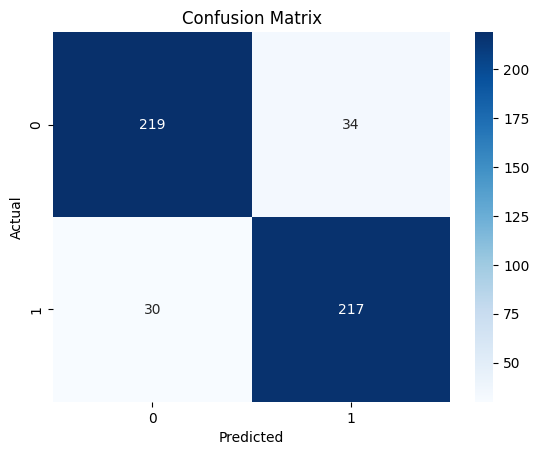

In [15]:
# Оценка надежности модели с помощью кросс-таблицы
cross = confusion_matrix(y_test, y_pred)
sns.heatmap(cross, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
# Метрики модели
print(classification_report(y_test, y_pred))
accuracy = lr.score(X_test, y_test)
print(f"Точность модели: {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       253
           1       0.86      0.88      0.87       247

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500

Точность модели: 0.87


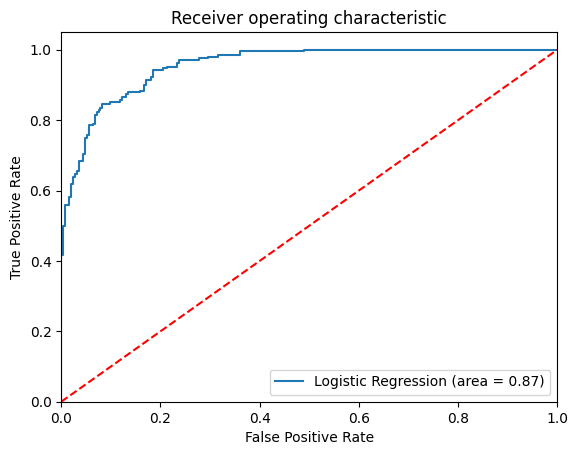

In [11]:
# Построение ROC-кривой
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

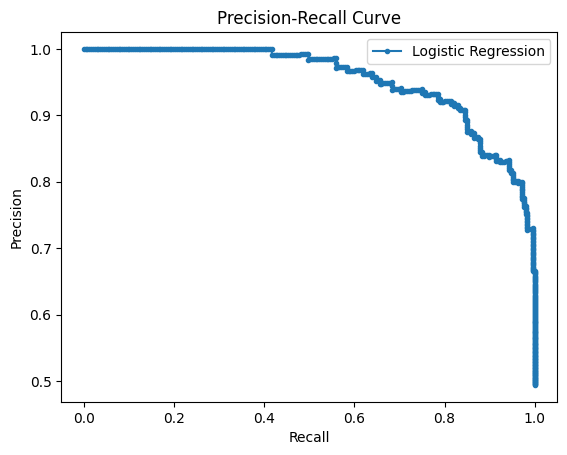

In [21]:
# ПОстроение Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, lr.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

2 Задача “Прогнозирование выживаемости на Титанике”.

Используйте уже знакомый Вам датасет о выживших и погибших пассажирах Титаника.

Исходя из логических соображений, отбросьте переменные, которые не могут влиять на возможность пассажира выжить в катастрофе (обоснуйте сделанный выбор). Затем, оставшиеся категориальные переменные (строки) закодируйте целыми числами (например, 0 / 1 для мужчин и женщин). Разбейте полученный датасет на обучающуюи тестовую выборки. Обучите модель логистической регрессии и затем для тестовой выборки, предскажите выжил ли пассажир. Сравните полученный результат с фактическими данными. Оцените надежность построенной предсказательной модели с использованием кросс-таблицы, метрик и ROC-анализа

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns

In [75]:
# Загрузка данных о пассажирах Титаника
df2 = pd.read_csv('/content/sample_data/titanic_train.csv', sep=',', decimal='.')

In [76]:
# Преобразование категориальных переменных (мужчины и женщины) в числовые значения:
# 1 для мужчин и 0 для женщин
df2 = df2.replace(to_replace=['male', 'female'], value=[1, 0])

<ipython-input-76-72245f757fa9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace(to_replace=['male', 'female'], value=[1, 0])


In [77]:
# Выводим данные для проверки после преобразования
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [78]:
df_prev = df2.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])
# Убираем ненужные и неинформативные столбцы:
# 'PassengerId' — уникальный идентификатор, не влияющий на выживаемость.
# 'Name' — уникальные имена, не имеют смысла для предсказания.
# 'Ticket' — уникальные значения, не влияют на выживаемость.
# 'Cabin' — много пропущенных значений, мало информации о выживаемости.
# 'Embarked' — порт отправления, не имеет сильной связи с выживаемостью.

In [79]:
# Удаляем строки с пропущенными значениями
df_prev = df_prev.dropna()

In [80]:
# Определяем независимые (X) и зависимую (y) переменные:
X = df_prev.drop(columns=['Survived'])
y = df_prev.Survived

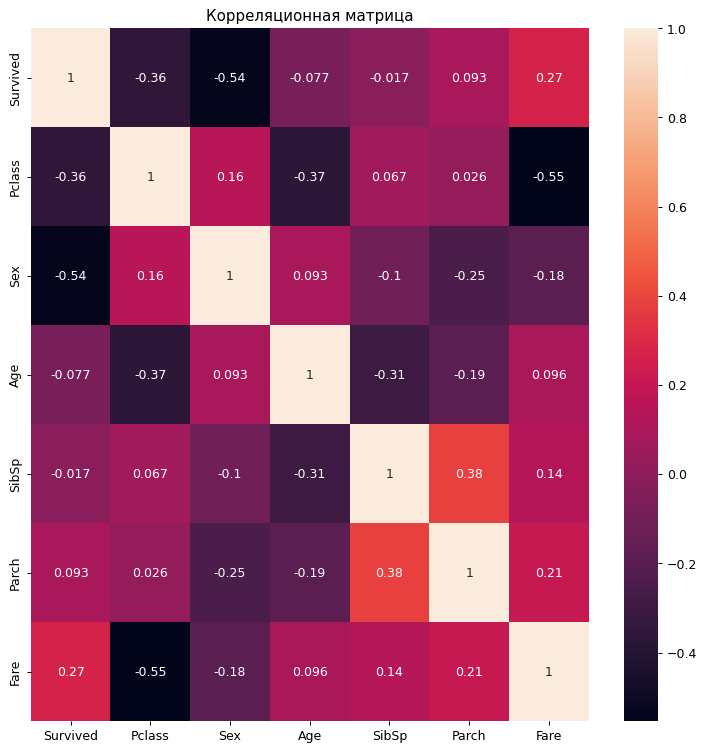

In [81]:
numeric_df = df_prev.select_dtypes(include=[np.number])

# Строим корреляционную матрицу
plt.figure(figsize=(10, 10), dpi=90)
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    xticklabels=numeric_df.corr().columns,
    yticklabels=numeric_df.corr().columns
)
plt.title("Корреляционная матрица")
plt.show()

In [82]:
# Разделяем данные на обучающую и тестовую выборки (30% на тест, 70% на обучение)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [83]:
# Строим модель логистической регрессии с 300 итерациями (максимум для сходимости)
lr = LogisticRegression(max_iter=300)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       134
           1       0.78      0.77      0.78        81

    accuracy                           0.83       215
   macro avg       0.82      0.82      0.82       215
weighted avg       0.83      0.83      0.83       215



In [84]:
# Строим кросс-таблицу (Confusion Matrix) для оценки результатов предсказаний
pd.crosstab(y_test, y_pred)

col_0,0,1
Survived,,
0,117,17
1,19,62


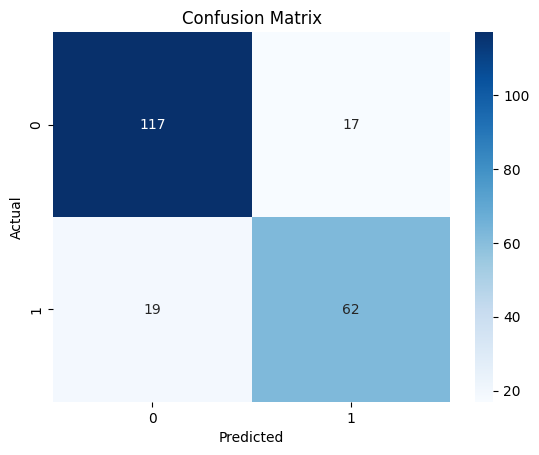

Правильно: 179 
Неправильно: 36


In [85]:
cross = confusion_matrix(y_test, y_pred)
sns.heatmap(cross, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Правильно:", cross[0][0] + cross[1][1], "\nНеправильно:", cross[1][0] + cross[0][1])

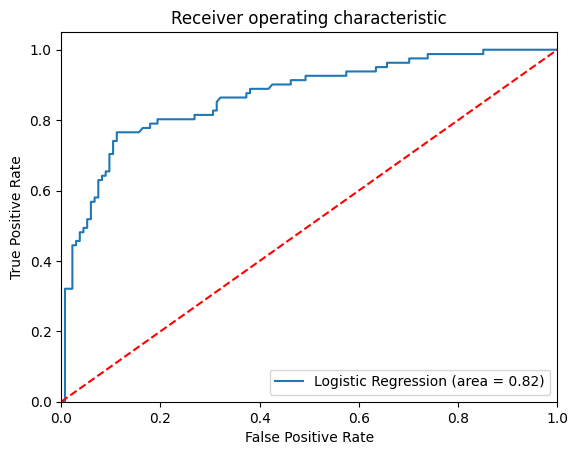

In [87]:
# Оценка модели с использованием ROC-AUC
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
# Построение графика ROC-кривой
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()